In [1]:
# Import all required libraries

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # adjust the configuration of the plots we will create

In [7]:
# Read in the data
df= pd.read_csv(r'C:\Users\sanga\Downloads\movies.csv')

In [8]:
 # View the data   

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# look for missing values

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [27]:
# filling missing values in all columns
df.fillna(0,inplace=True)

In [28]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object

In [31]:
# Changing the data types of the columns

df['budget']= df['budget'].astype('int64')
df['score']= df['score'].astype('int64')
df['votes']= df['votes'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['runtime']= df['runtime'].astype('int64')




In [32]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [114]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
5445,533,6,0,2009,697,7,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,29
7445,535,6,0,2019,184,8,903000,162,744,2242,56,356000000,2797501328,1607,181,39
3045,6896,6,6,1997,705,7,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,17
6663,5144,6,0,2015,699,7,876000,1125,2551,525,56,245000000,2069521700,1541,138,35
7244,536,6,0,2018,193,8,897000,162,744,2242,56,321000000,2048359754,1607,149,38


In [36]:
# create a new column for the correct year column

df['Correct Year']=df['year'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020


In [91]:
# sorting data

df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [92]:
pd.set_option('display.max_rows', None)

In [115]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
5445,533,6,0,2009,697,7,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,29
7445,535,6,0,2019,184,8,903000,162,744,2242,56,356000000,2797501328,1607,181,39
3045,6896,6,6,1997,705,7,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,17
6663,5144,6,0,2015,699,7,876000,1125,2551,525,56,245000000,2069521700,1541,138,35
7244,536,6,0,2018,193,8,897000,162,744,2242,56,321000000,2048359754,1607,149,38


In [44]:
# Lets find out correlation by estimate

In [45]:
# we can use scatter diagram to check correlation bw any to columns
# I'll check for correlationn of gross earning of the movie with budget and the company

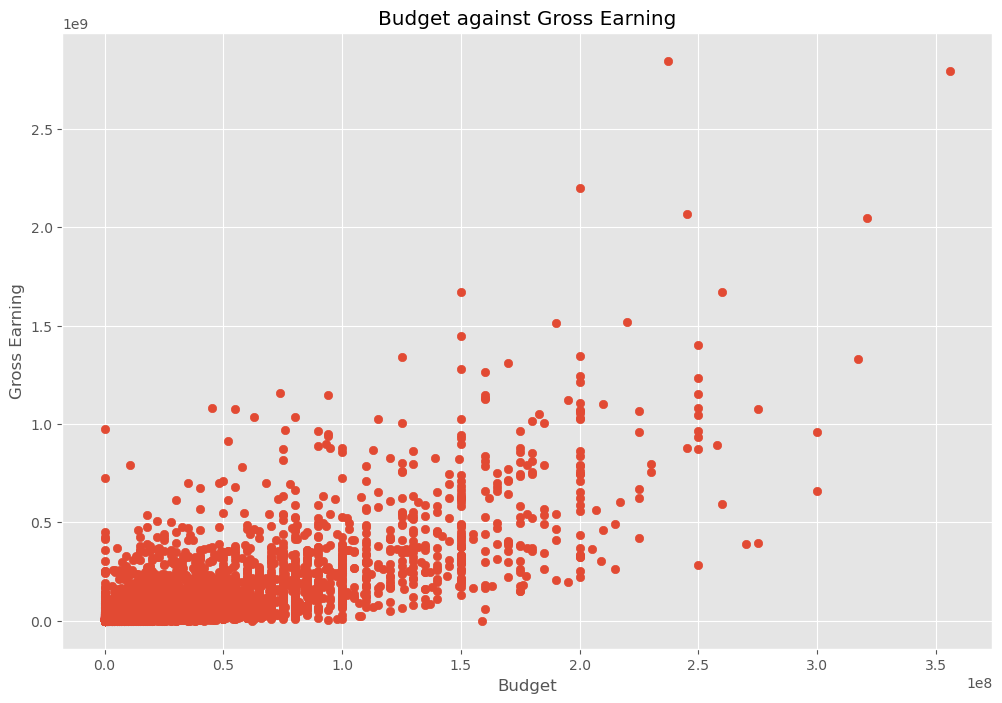

In [94]:
# scatter daigram for Budget against Gross earning
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget against Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

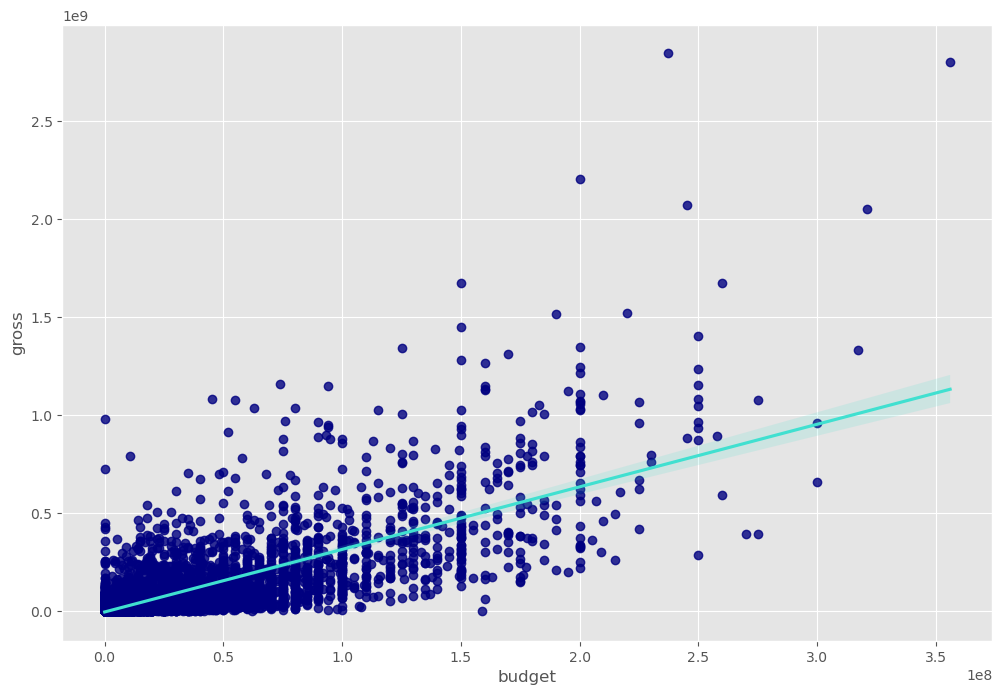

In [95]:
# adding regression line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"navy"}, line_kws={"color":"turquoise"})

In [96]:
numeric_df = df.select_dtypes(include=['number'])

In [97]:
# looking for correlation by command
# 3 methods of corelation: "pearson","kendall","spearman"

In [98]:
numeric_df.corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017191,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.011453
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.002753,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.008779
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023134,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.081261
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.091429,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,1.000000
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.038676,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.000695
score,0.017191,0.002753,0.023134,0.091429,0.038676,1.000000,0.391952,0.017562,0.022961,-0.000075,-0.125743,0.053473,0.177451,0.002977,0.379436,0.091429
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.391952,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.222427
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.017562,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020795
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022961,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008656
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000075,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027242


In [99]:
# correlation between budget and gross earning is high as estimated


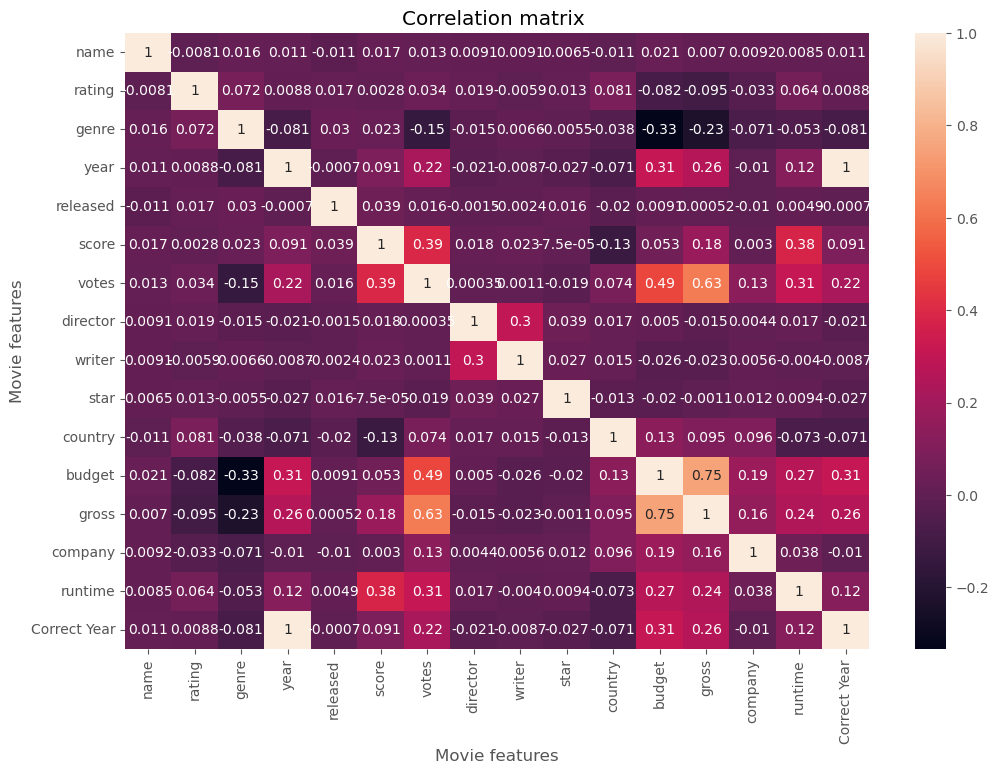

In [100]:
correlation_matrix=numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix ')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [ ]:
# correlation with company

In [117]:
#numerizing the company names
df_numerized= df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()
       

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
5445,533,6,0,2009,697,7,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,29
7445,535,6,0,2019,184,8,903000,162,744,2242,56,356000000,2797501328,1607,181,39
3045,6896,6,6,1997,705,7,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,17
6663,5144,6,0,2015,699,7,876000,1125,2551,525,56,245000000,2069521700,1541,138,35
7244,536,6,0,2018,193,8,897000,162,744,2242,56,321000000,2048359754,1607,149,38


In [116]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
5445,533,6,0,2009,697,7,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,29
7445,535,6,0,2019,184,8,903000,162,744,2242,56,356000000,2797501328,1607,181,39
3045,6896,6,6,1997,705,7,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,17
6663,5144,6,0,2015,699,7,876000,1125,2551,525,56,245000000,2069521700,1541,138,35
7244,536,6,0,2018,193,8,897000,162,744,2242,56,321000000,2048359754,1607,149,38


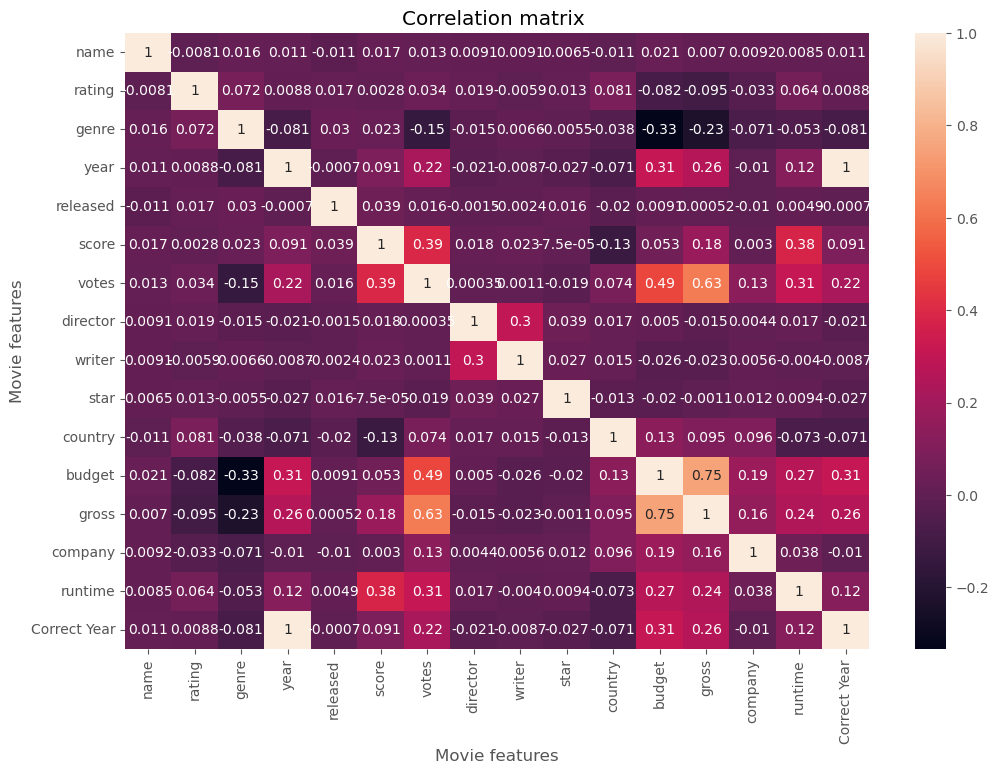

In [103]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix ')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [105]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017191,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.011453
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.002753,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.008779
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023134,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.081261
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.091429,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,1.000000
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.038676,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.000695
score,0.017191,0.002753,0.023134,0.091429,0.038676,1.000000,0.391952,0.017562,0.022961,-0.000075,-0.125743,0.053473,0.177451,0.002977,0.379436,0.091429
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.391952,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.222427
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.017562,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020795
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022961,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008656
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000075,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027242


In [107]:
correlation_mat=df_numerized.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017191
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.008483
              Correct Year    0.011453
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score           0.002753
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [108]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
votes         genre          -0.145296
country       score          -0.125743
score         country        -0.125743
rating        gross          -0.095450
gross         rating         -0.095450
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
Correct Year  genre          -0.081261
genre         Correct Year   -0.081261
country       runtime        -0.073319
runtime       country        -0.073319
company       genre          -0.071067
genre         company        -0.071067
Correct Year  country        -0.070938
country       Correct Year   -0.070938
              year           -0.070938
year          country        -0.070938
runtime       genre          -0.052914
genre         runtime    

In [113]:
high_correlation= sorted_pairs[(sorted_pairs)>0.5]
high_correlation

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
name          name            1.000000
company       company         1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
runtime       runtime         1.000000
votes         votes           1.000000
writer        writer          1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
director      director        1.000000
Correct Year  Correct Year    1.000000
              year            1.000000
year          Correct Year    1.000000
dtype: float64

In [ ]:
# We can conclude that Votes and Budget have high correlation with the Gross earning of a movie.
# Company doesn't have any significant impact on the gross earning as we assumed.